In [12]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

%matplotlib inline

In [2]:
results = pd.read_csv(
    './../../data_source/results/removed_broken_slices/group_lasso_all_features_removed_broken_slices.csv',
    index_col=0
)
results.head()

,exp_id,experiment_id,GroupLASSOEstimator__alpha,GroupLASSOEstimator__distr,GroupLASSOEstimator__learning_rate,GroupLASSOEstimator__reg_lambda,test_score,train_score,test_score_variance,train_score_variance,feature_votes,exp_duration
0,44,GroupLASSOEstimator,0.5,poisson,0.01,0.001,0.533974,0.534259,0.004003,0.000121,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,0 days 00:26:13.225392000
1,47,GroupLASSOEstimator,0.5,poisson,0.01,0.001,0.512179,0.537037,0.000694,0.000069,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,0 days 00:28:09.414360000
2,0,GroupLASSOEstimator,0.5,poisson,0.01,0.001,0.537821,0.529630,0.003579,0.000082,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,0 days 00:21:04.810039000
3,3,GroupLASSOEstimator,0.5,poisson,0.01,0.001,0.525000,0.532407,0.003143,0.000056,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,0 days 00:26:10.266167000
4,3,GroupLASSOEstimator,0.5,poisson,0.01,0.001,0.525000,0.532407,0.003143,0.000056,[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...,0 days 00:25:58.047853000


In [3]:
results.shape

(50, 12)

"\nplt.savefig(\n    './../../../figures/fisher_dtree_validation_curve.png',\n    bbox_inches='tight',\n    transparent=True,\n    dpi=100,\n)\n"

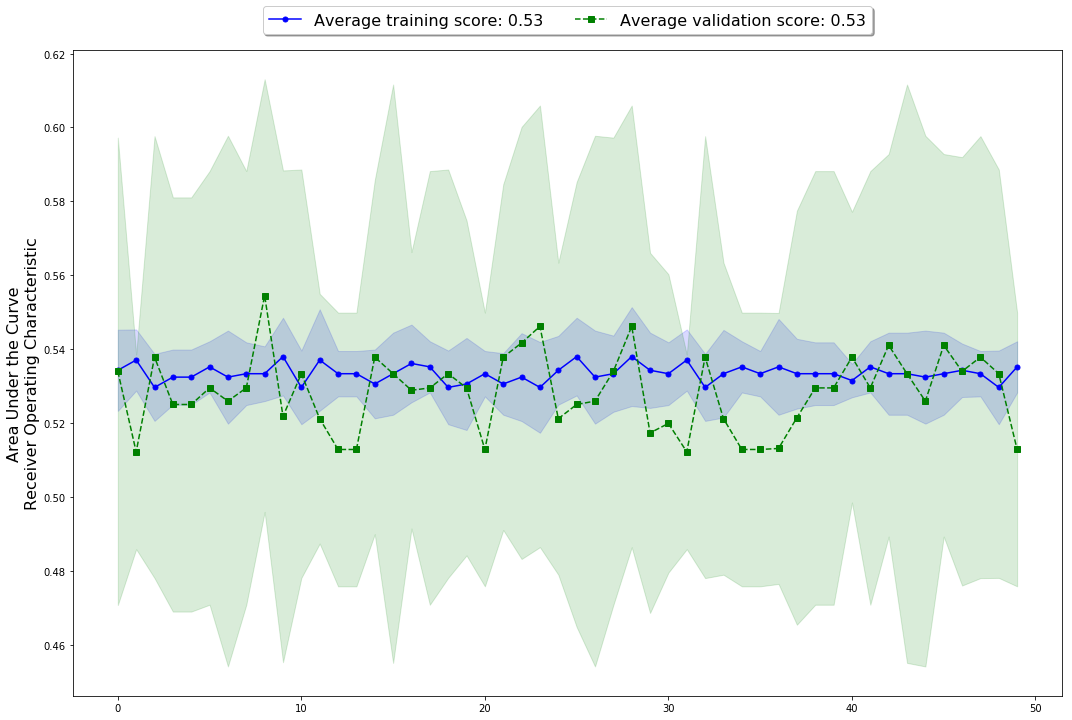

In [9]:
test = results['test_score']
train = results['train_score']
test_std = np.sqrt(results['test_score_variance'])
train_std = np.sqrt(results['train_score_variance'])

# Repeated experiments.
x_coords = np.arange(np.size(test))

plt.figure(figsize=(15, 10))
plt.plot(
    x_coords, 
    train, 
    color='blue', marker='o', markersize=5, 
    label=f"Average training score: {np.round(np.mean(train), 2)}"
)
plt.plot(
    x_coords, 
    test, 
    color='green', linestyle='--', marker='s', 
    label=f"Average validation score: {np.round(np.mean(test), 2)}"
)
plt.fill_between(
    x_coords, 
    train - train_std, 
    train + train_std, 
    alpha=0.15, color='blue'
)
plt.fill_between(
    x_coords, 
    test - test_std, 
    test + test_std, 
    alpha=0.15, color='green'
)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.08),
    #title=f'Best test score: {np.round(np.max(dummy_test), 2)}',
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
#plt.set_ylim([0.3, 0.9])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)
plt.tight_layout()
"""
plt.savefig(
    './../../../figures/fisher_dtree_validation_curve.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100,
)
"""                   

In [13]:
for var_label in list(results.filter(regex='GroupLASSOEstimator').columns):
    var = np.copy(results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

alpha
------------------------------------------------------------
Counter({0.5: 50})
------------------------------------------------------------


distr
------------------------------------------------------------
Counter({'poisson': 50})
------------------------------------------------------------


learning_rate
------------------------------------------------------------
Counter({0.01: 50})
------------------------------------------------------------


reg_lambda
------------------------------------------------------------
Counter({0.001: 50})
------------------------------------------------------------


